TITANIC SURVIVAL PREDICTION

Step 1: Importing the required libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Step 2: Importing data 

In [90]:
titanic_data = pd.read_csv("titanic_dataset.csv")

In [91]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [93]:
titanic_data.shape

(891, 12)

In [94]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Step 4: Data Pre-processing

In [95]:
#Removing columns with lots of null values.

In [96]:
titanic_data = titanic_data.drop(columns="Cabin", axis = 1)

In [97]:
#Removing Unnecessary columns

In [98]:
titanic_data = titanic_data.drop(columns="PassengerId", axis = 1)
titanic_data = titanic_data.drop(columns="Name", axis = 1)
titanic_data = titanic_data.drop(columns="Ticket", axis = 1)

In [99]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [100]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [101]:
#Replacing null values with average values.

In [102]:
titanic_data["Age"].fillna(titanic_data["Age"].mean(), inplace=True)

In [19]:
#Replacing null values with most occuring values.

In [21]:
titanic_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
titanic_data["Embarked"].fillna('S',inplace=True)

In [23]:
titanic_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
#Now there are no null values.

In [25]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
titanic_data.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [27]:
titanic_data.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [28]:
#Number of people survived.

In [30]:
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Step 5: Data vizualization

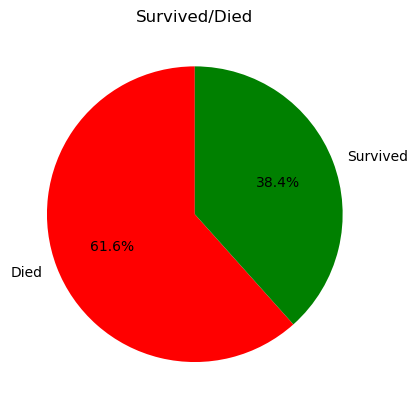

In [32]:
survived_counts = titanic_data['Survived'].value_counts()
labels = ['Died', 'Survived']
sizes = survived_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,colors=['red', 'green'])
plt.title("Survived/Died")
plt.show()

Based on Age

<AxesSubplot: xlabel='Age', ylabel='Count'>

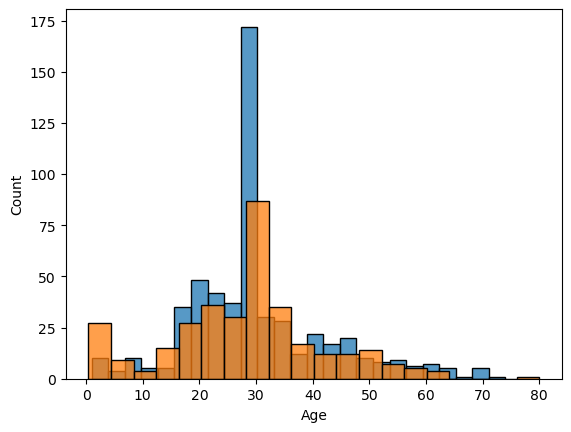

In [33]:
sns.histplot(titanic_data["Age"][titanic_data["Survived"]==0])
sns.histplot(titanic_data["Age"][titanic_data["Survived"]==1])

Based on Sex

<AxesSubplot: xlabel='Sex', ylabel='count'>

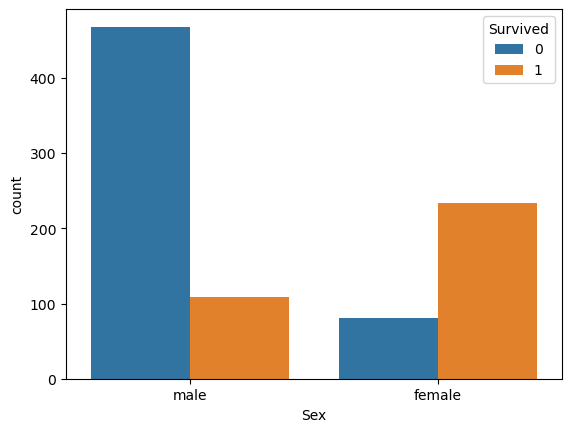

In [34]:
sns.countplot(data=titanic_data, x='Sex', hue='Survived')

Based on fare

<AxesSubplot: xlabel='Fare', ylabel='Count'>

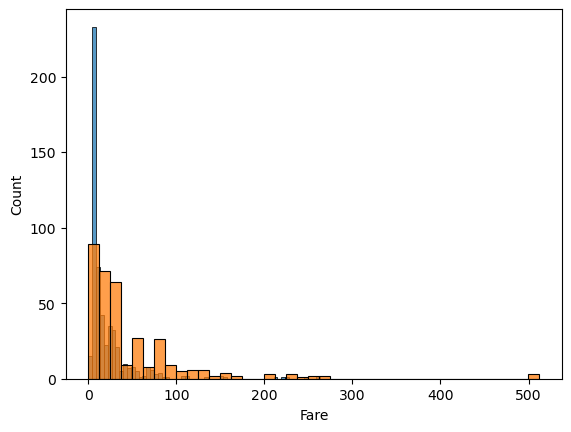

In [35]:
sns.histplot(titanic_data["Fare"][titanic_data["Survived"]==0])
sns.histplot(titanic_data["Fare"][titanic_data["Survived"]==1])

Based on Location

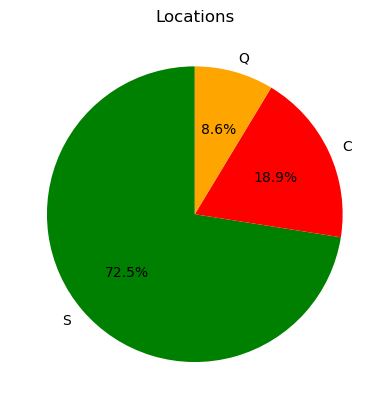

In [36]:
Embarked_counts = titanic_data['Embarked'].value_counts()
labels = ['S', 'C', 'Q']
sizes = Embarked_counts.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=90,colors=['green', 'red', 'orange'])
plt.title("Locations")
plt.show()

In [37]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [38]:
#Converting non-numerics into numerical values.

In [39]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])


In [40]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [41]:
#Train Data

In [42]:
X=titanic_data.drop('Survived',axis=1)
Y=titanic_data['Survived']
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    1  22.000000      1      0   7.2500         2
1         1    0  38.000000      1      0  71.2833         0
2         3    0  26.000000      0      0   7.9250         2
3         1    0  35.000000      1      0  53.1000         2
4         3    1  35.000000      0      0   8.0500         2
..      ...  ...        ...    ...    ...      ...       ...
886       2    1  27.000000      0      0  13.0000         2
887       1    0  19.000000      0      0  30.0000         2
888       3    0  29.699118      1      2  23.4500         2
889       1    1  26.000000      0      0  30.0000         0
890       3    1  32.000000      0      0   7.7500         1

[891 rows x 7 columns]


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [44]:
len(X_train)
len(Y_train)

712

In [45]:
len(X_test)
len(Y_test)

179

In [46]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
30,1,1,40.0,0,0,27.7208,0
10,3,0,4.0,1,1,16.7000,2
873,3,1,47.0,0,0,9.0000,2
182,3,1,9.0,4,2,31.3875,2
876,3,1,20.0,0,0,9.8458,2


In [47]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,1,42.0,0,0,26.2875,2
37,3,1,21.0,0,0,8.0500,2
615,2,0,24.0,1,2,65.0000,2
169,3,1,28.0,0,0,56.4958,2
68,3,0,17.0,4,2,7.9250,2


In [48]:
#LOGISTIC REGRESSION

In [49]:
from sklearn.linear_model import LogisticRegression
titanicmodel=LogisticRegression(random_state=2)
titanicmodel.fit(X_train,Y_train)

LogisticRegression(random_state=2)

In [50]:
#Converting model into prediction model.

In [80]:
test_data=pd.DataFrame(X_test)

In [79]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
707,1,1,42.0,0,0,26.2875,2
37,3,1,21.0,0,0,8.0500,2
615,2,0,24.0,1,2,65.0000,2
169,3,1,28.0,0,0,56.4958,2
68,3,0,17.0,4,2,7.9250,2


In [84]:
predictions=titanicmodel.predict(X_test)

In [85]:
print(predictions)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [87]:
X_test['Survived']=predictions;
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
707,1,1,42.000000,0,0,26.2875,2,0
37,3,1,21.000000,0,0,8.0500,2,0
615,2,0,24.000000,1,2,65.0000,2,1
169,3,1,28.000000,0,0,56.4958,2,0
68,3,0,17.000000,4,2,7.9250,2,0
...,...,...,...,...,...,...,...,...
89,3,1,24.000000,0,0,8.0500,2,0
80,3,1,22.000000,0,0,9.0000,2,0
846,3,1,29.699118,8,2,69.5500,2,0
870,3,1,26.000000,0,0,7.8958,2,0


In [88]:
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7877094972067039
